In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
def get_profiles(paths, bounds):
    imgs = [load_image(d + '/af_corrected.tif') for d in paths]
    rois = [np.loadtxt(d + '/ROI_fit.txt') for d in paths]
    straight = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
    profiles = np.array([bounded_mean_2d(s, bounds) for s in straight])
    profiles_norm = np.array([p / bounded_mean_1d(p, [0.9, 1]) for p in profiles])
    return profiles_norm

wt_paths = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt_par3', 1)
gcn4_paths = direcslist('/Users/blandt/Desktop/Data/PAR2 GCN4/wt_gcn4_par3', 1)

wt_profiles_post = get_profiles(wt_paths, [0.9, 0.1])
gcn4_profiles_post = get_profiles(gcn4_paths, [0.9, 0.1])
wt_profiles_ant = get_profiles(wt_paths, [0.4, 0.6])
gcn4_profiles_ant = get_profiles(gcn4_paths, [0.4, 0.6])
wt_profiles_tot = get_profiles(wt_paths, [0, 1])
gcn4_profiles_tot = get_profiles(gcn4_paths, [0, 1])

### Anterior profiles: wt vs GCN4

<IPython.core.display.Javascript object>


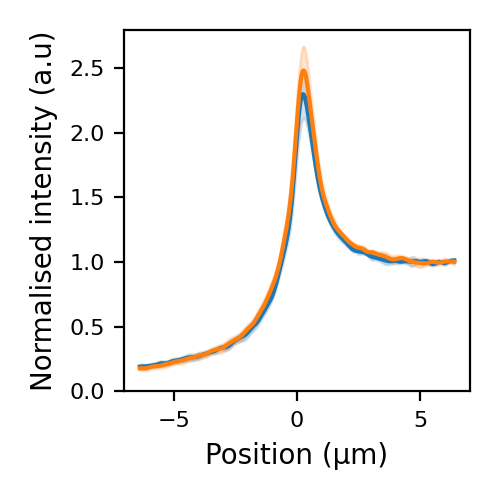

In [3]:
def func(profiles, ax, c):
    p_mean = np.mean(np.array(profiles), axis=0)
    p_std = np.std(np.array(profiles), axis=0)
#     for p in profiles:
#         ax.plot(p, c=c)
    ax.plot(0.255 * np.linspace(-25, 25, 500), p_mean, c=c)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), p_mean - p_std, p_mean + p_std, color=c, alpha=0.2)
    
fig, ax = plt.subplots()
func(wt_profiles_ant, ax, 'tab:blue')
func(gcn4_profiles_ant, ax, 'tab:orange')
# ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity (a.u)')
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()

### Posterior profiles: wt vs GCN4

<IPython.core.display.Javascript object>


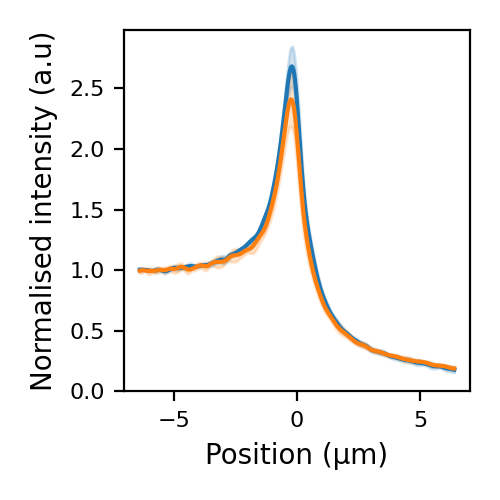

In [4]:
def func(profiles, ax, c):
    p_mean = np.mean(np.array(profiles), axis=0)[::-1]
    p_std = np.std(np.array(profiles), axis=0)[::-1]
#     for p in profiles:
#         ax.plot(p, c=c)
    ax.plot(0.255 * np.linspace(-25, 25, 500), p_mean, c=c)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), p_mean - p_std, p_mean + p_std, color=c, alpha=0.2)
    

fig, ax = plt.subplots()
func(wt_profiles_post, ax, 'tab:blue')
func(gcn4_profiles_post, ax, 'tab:orange')
# ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity (a.u)')
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()

### Whole cell

<IPython.core.display.Javascript object>


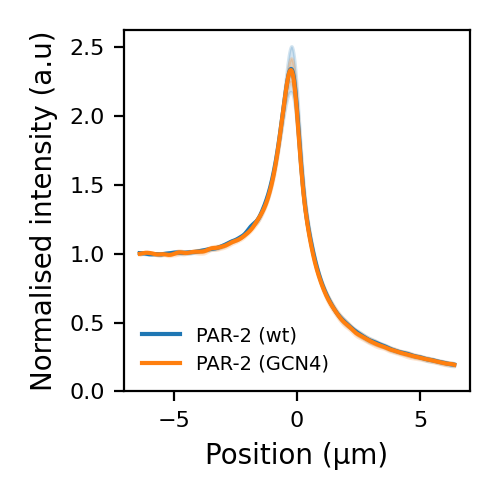

In [6]:
def func(profiles, ax, c, label):
    p_mean = np.mean(np.array(profiles), axis=0)[::-1]
    p_std = np.std(np.array(profiles), axis=0)[::-1]
#     for p in profiles:
#         ax.plot(p, c=c)
    ax.plot(0.255 * np.linspace(-25, 25, 500), p_mean, c=c, label=label)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), p_mean - p_std, p_mean + p_std, color=c, alpha=0.2)
    

fig, ax = plt.subplots()
func(wt_profiles_tot, ax, 'tab:blue', label='PAR-2 (wt)')
func(gcn4_profiles_tot, ax, 'tab:orange', label='PAR-2 (GCN4)')
ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity (a.u)')
ax.set_ylim(bottom=0)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs par3mut/profiles.png', dpi=600, transparent=True)